In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style
sns.set(style='whitegrid')

C:\Users\Vedha\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the match-level dataset
matches = pd.read_csv("T20a.csv")

# Load the ball-by-ball dataset
balls = pd.read_csv("T20b.csv")

In [4]:
matches.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2024,Canada,United States of America,2024/06/01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,NaN,7.0,Group
1,2024,Papua New Guinea,West Indies,2024/06/02,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,NaN,5.0,Group
2,2024,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,NaN,NaN,NaN,Group
3,2024,Sri Lanka,South Africa,2024/06/03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,NaN,6.0,Group
4,2024,Afghanistan,Uganda,2024/06/03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.0,NaN,Group


In [5]:
balls.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.1,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.2,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.3,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.4,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.5,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Shape and basic info
print(matches.shape)
print(matches.info())
print(balls.shape)
print(balls.info())

# Check for missing values
print(matches.isnull().sum())
print(balls.isnull().sum())

(52, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           52 non-null     int64  
 1   team1            52 non-null     object 
 2   team2            52 non-null     object 
 3   date             52 non-null     object 
 4   match_number     52 non-null     int64  
 5   venue            52 non-null     object 
 6   city             52 non-null     object 
 7   toss_winner      52 non-null     object 
 8   toss_decision    52 non-null     object 
 9   player_of_match  51 non-null     object 
 10  umpire1          52 non-null     object 
 11  umpire2          52 non-null     object 
 12  reserve_umpire   52 non-null     object 
 13  match_referee    52 non-null     object 
 14  winner           50 non-null     object 
 15  winner_runs      25 non-null     float64
 16  winner_wickets   24 non-null     float64
 17  match_typ

In [8]:
# Fill missing winners with "No Result" if not already done
matches['winner'].fillna('No Result', inplace=True)

# Standardize venue and city names if needed (optional)
matches['venue'] = matches['venue'].str.strip()


C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\1142664814.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['winner'].fillna('No Result', inplace=True)


In [9]:
team_colors = {
    'India': '#1C4E80',
    'Pakistan': '#006400',
    'Australia': '#FDD835',
    'England': '#C8102E',
    'South Africa': '#006644',
    'New Zealand': '#101820',
    'Afghanistan': '#0072C6',
    'Bangladesh': '#006A4E',
    'Sri Lanka': '#002663',
    'West Indies': '#800000',
    'Netherlands': '#FF6600',
    'Ireland': '#339966',
    'Scotland': '#4B0082',
    'United States of America': '#3C3B6E',
    'Canada': '#FF0000',
    'Namibia': '#005BAC',
    'Oman': '#D52B1E',
    'Papua New Guinea': '#FFCC00',
    'Uganda': '#FFCD00',
    'Nepal': '#DC143C'
}

C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\300095277.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.values, y=win_counts.index, palette=colors)


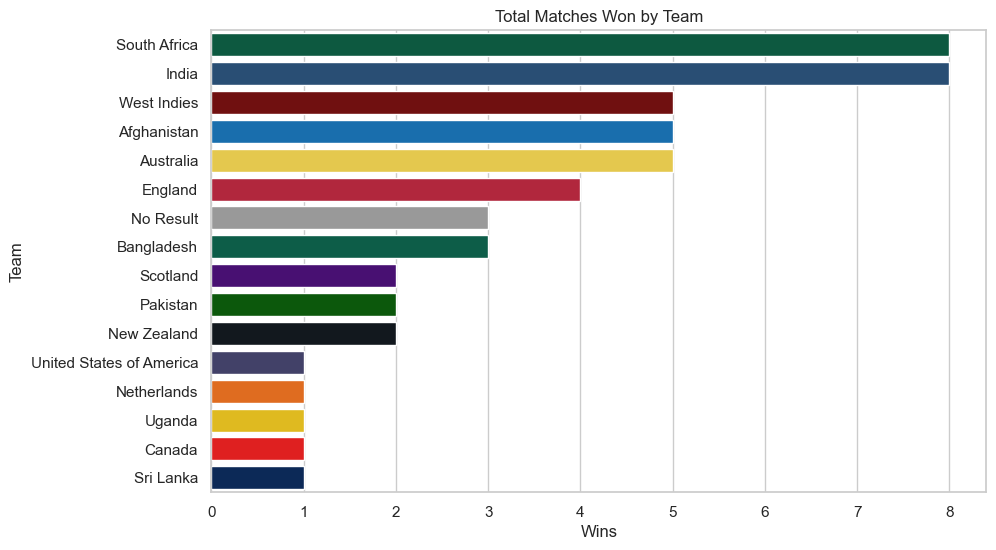

In [10]:
#matches won by team
win_counts = matches['winner'].fillna('No Result').value_counts()
colors = [team_colors.get(team, "#999999") for team in win_counts.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=win_counts.values, y=win_counts.index, palette=colors)
plt.title("Total Matches Won by Team")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.show()

C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\1467894546.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_decision.index, y=toss_decision.values, palette='Set2')


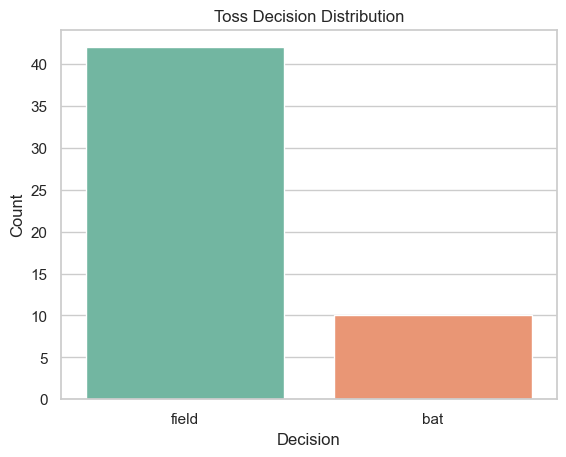

In [11]:
#toss decision

toss_decision = matches['toss_decision'].value_counts()

sns.barplot(x=toss_decision.index, y=toss_decision.values, palette='Set2')
plt.title("Toss Decision Distribution")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.show()


In [12]:
toss_wins = matches[matches['toss_winner'] == matches['winner']]
percentage = len(toss_wins) / len(matches) * 100
print(f"Toss winner also won the match in {percentage:.2f}% of matches.")


Toss winner also won the match in 50.00% of matches.


C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\1407458207.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette=player_colors)


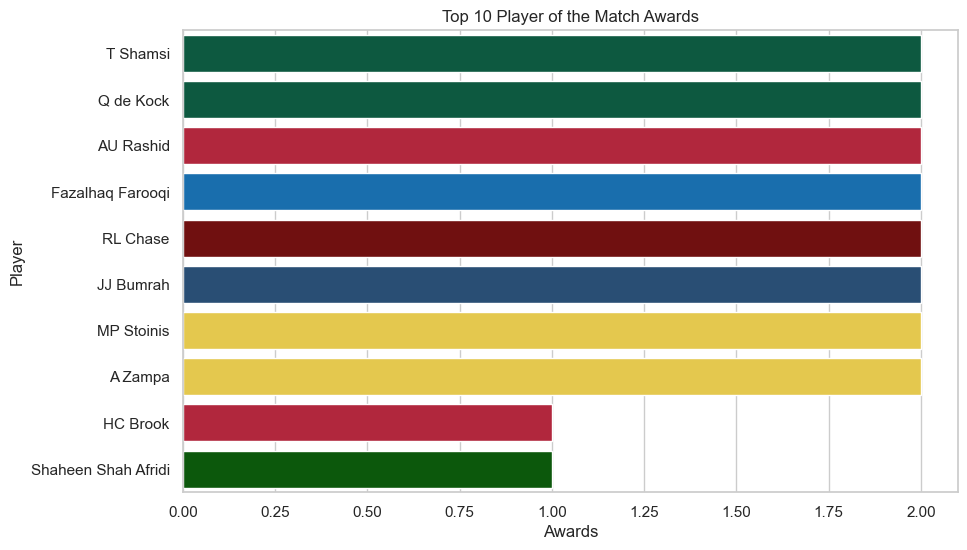

In [13]:
# Build player-country mapping from matches they won Player of the Match
player_country_map = {}

for _, row in matches.iterrows():
    player = row['player_of_match']
    winner = row['winner']
    if pd.notna(player) and pd.notna(winner):
        if player not in player_country_map:
            player_country_map[player] = winner
top_players = matches['player_of_match'].value_counts().dropna().head(10)

# Map player to country, then to team color
player_colors = [
    team_colors.get(player_country_map.get(player, ""), "#999999")
    for player in top_players.index
]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_players.values, y=top_players.index, palette=player_colors)
plt.title("Top 10 Player of the Match Awards")
plt.xlabel("Awards")
plt.ylabel("Player")
plt.show()


C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\688986039.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='mako')


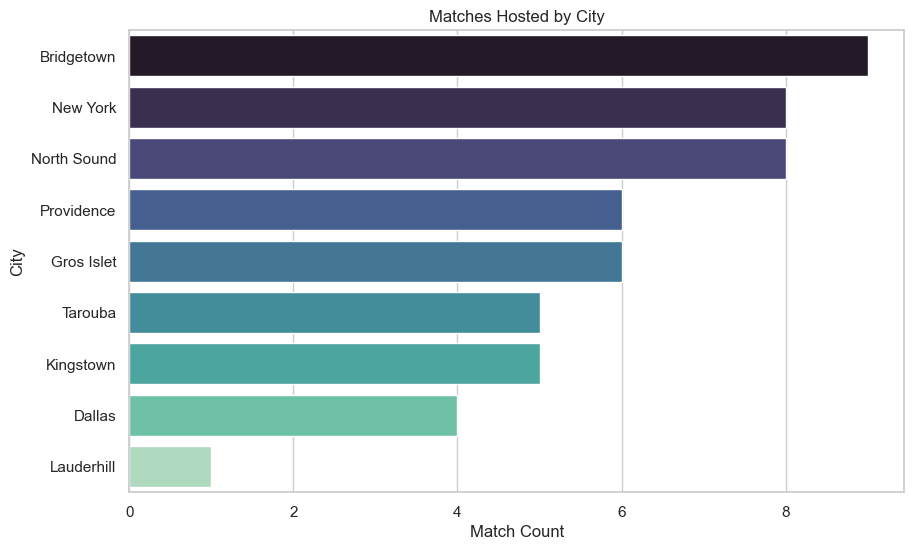

In [14]:
#matches count by city
city_counts = matches['city'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='mako')
plt.title("Matches Hosted by City")
plt.xlabel("Match Count")
plt.ylabel("City")
plt.show()

C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\851520604.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=matches, x='outcome_type', palette='coolwarm')


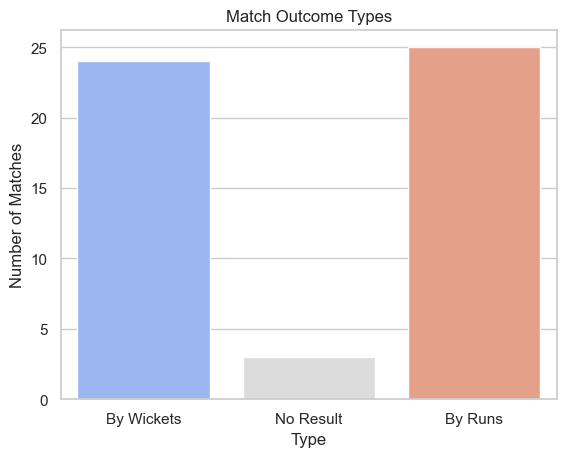

In [15]:
def outcome_type(row):
    if pd.notna(row['winner_runs']):
        return "By Runs"
    elif pd.notna(row['winner_wickets']):
        return "By Wickets"
    else:
        return "No Result"

matches['outcome_type'] = matches.apply(outcome_type, axis=1)

sns.countplot(data=matches, x='outcome_type', palette='coolwarm')
plt.title("Match Outcome Types")
plt.xlabel("Type")
plt.ylabel("Number of Matches")
plt.show()

C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\2152285157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_wins_by_team.values, y=toss_wins_by_team.index, palette=colors)


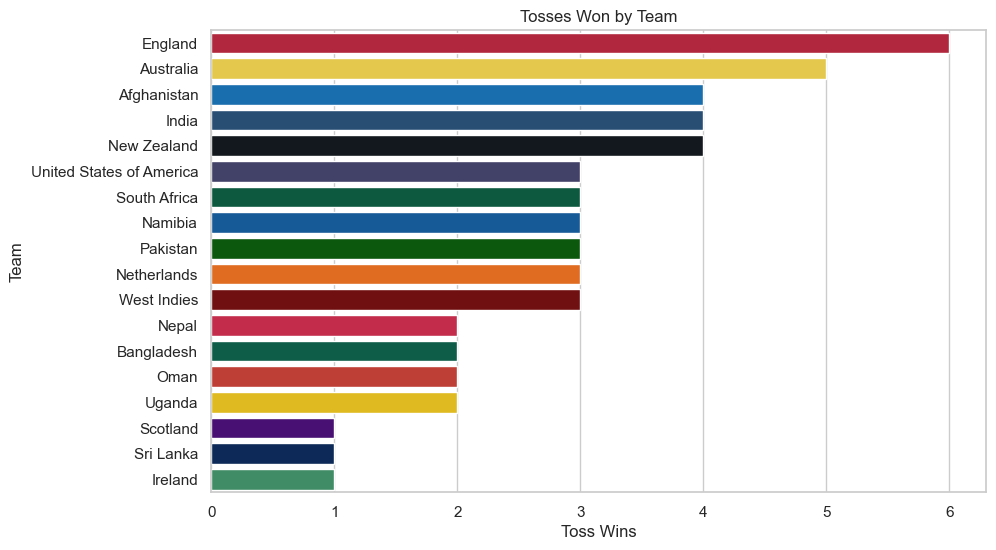

In [16]:
toss_wins_by_team = matches['toss_winner'].value_counts()
colors = [team_colors.get(team, "#999999") for team in toss_wins_by_team.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=toss_wins_by_team.values, y=toss_wins_by_team.index, palette=colors)
plt.title("Tosses Won by Team")
plt.xlabel("Toss Wins")
plt.ylabel("Team")
plt.show()

In [17]:
# 🧠 Build player → team mapping from batting and bowling data
player_team_map = {}
for _, row in balls.iterrows():
    for col in ['striker', 'non_striker']:
        if row[col] not in player_team_map:
            player_team_map[row[col]] = row['batting_team']
    if row['bowler'] not in player_team_map:
        player_team_map[row['bowler']] = row['bowling_team']


C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\84121988.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette=colors)


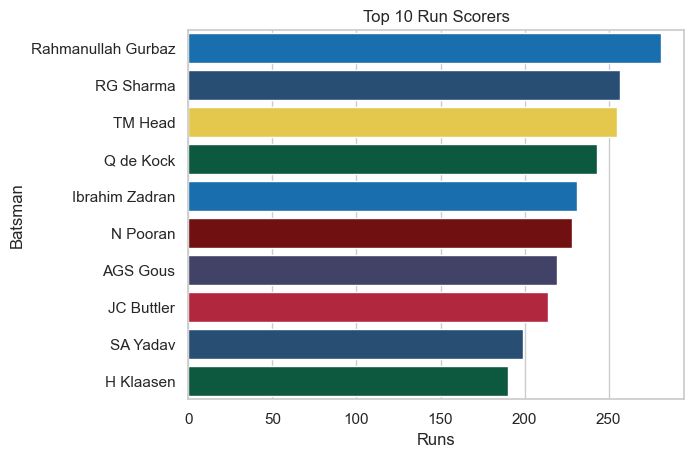

In [18]:
#top run scorer
top_batsmen = balls.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)
colors = [team_colors.get(player_team_map.get(p, ""), "#999999") for p in top_batsmen.index]

sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette=colors)
plt.title("Top 10 Run Scorers")
plt.xlabel("Runs")
plt.ylabel("Batsman")
plt.show()


C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\4066642396.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette=colors)


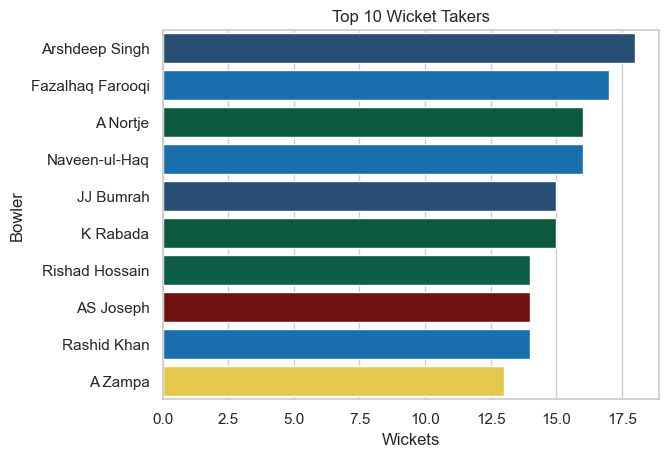

In [19]:
#top wicket taker
wickets = balls[balls['wicket_type'].notna()]
top_bowlers = wickets['bowler'].value_counts().head(10)
colors = [team_colors.get(player_team_map.get(p, ""), "#999999") for p in top_bowlers.index]

sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette=colors)
plt.title("Top 10 Wicket Takers")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()


C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\2461317507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=four_counts.values, y=four_counts.index, palette=colors)


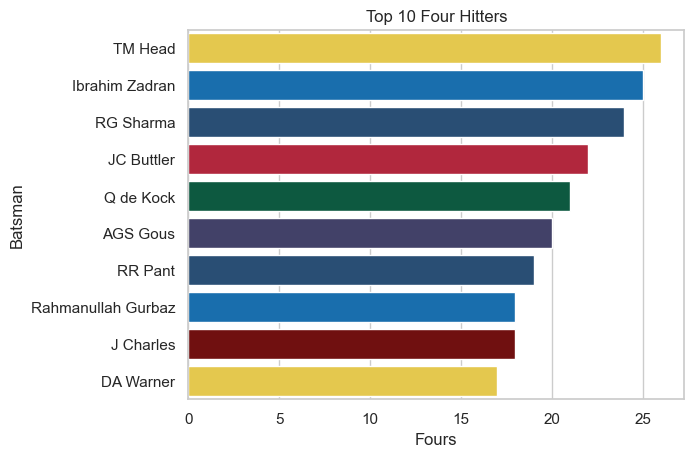

In [20]:
#most fours
fours = balls[balls['runs_off_bat'] == 4]
four_counts = fours['striker'].value_counts().head(10)
colors = [team_colors.get(player_team_map.get(p, ""), "#999999") for p in four_counts.index]

sns.barplot(x=four_counts.values, y=four_counts.index, palette=colors)
plt.title("Top 10 Four Hitters")
plt.xlabel("Fours")
plt.ylabel("Batsman")
plt.show()


C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\129463014.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=six_counts.values, y=six_counts.index, palette=colors)


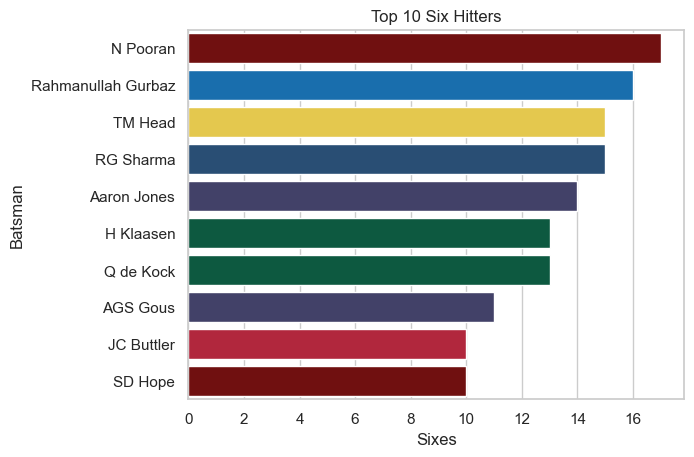

In [21]:
#most sixes
sixes = balls[balls['runs_off_bat'] == 6]
six_counts = sixes['striker'].value_counts().head(10)
colors = [team_colors.get(player_team_map.get(p, ""), "#999999") for p in six_counts.index]

sns.barplot(x=six_counts.values, y=six_counts.index, palette=colors)
plt.title("Top 10 Six Hitters")
plt.xlabel("Sixes")
plt.ylabel("Batsman")
plt.show()


C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\422070524.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_economy['economy'], y=top_economy.index, palette=colors)


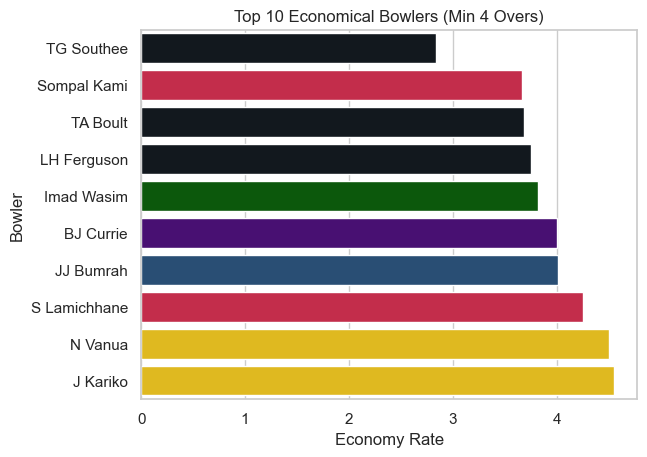

In [22]:
#bowling economy
balls['legal'] = ~balls['wides'].notna() & ~balls['noballs'].notna()

bowler_stats = balls[balls['legal']].groupby('bowler').agg(
    balls_bowled=('legal', 'sum'),
    runs_conceded=('runs_off_bat', 'sum')
).reset_index()

bowler_stats['overs'] = bowler_stats['balls_bowled'] / 6
bowler_stats = bowler_stats[bowler_stats['balls_bowled'] >= 24]
bowler_stats['economy'] = bowler_stats['runs_conceded'] / bowler_stats['overs']

top_economy = bowler_stats.sort_values('economy').head(10).set_index('bowler')
colors = [team_colors.get(player_team_map.get(p, ""), "#999999") for p in top_economy.index]

sns.barplot(x=top_economy['economy'], y=top_economy.index, palette=colors)
plt.title("Top 10 Economical Bowlers (Min 4 Overs)")
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.show()


C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\3392390462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dismissals.values, y=dismissals.index, palette='flare')


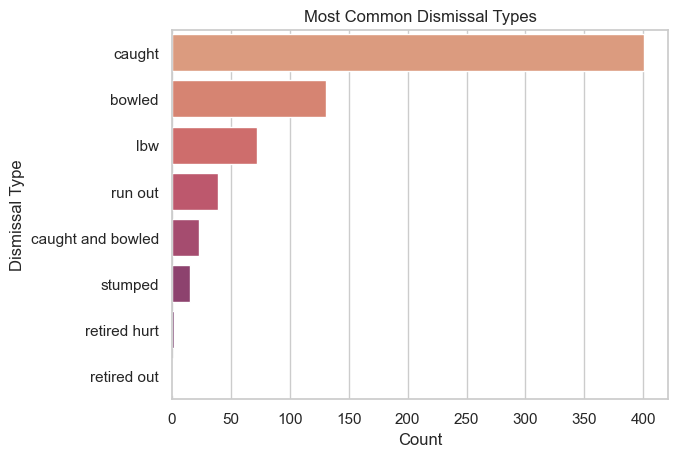

In [23]:
#dismissal types
dismissals = balls['wicket_type'].value_counts()

sns.barplot(x=dismissals.values, y=dismissals.index, palette='flare')
plt.title("Most Common Dismissal Types")
plt.xlabel("Count")
plt.ylabel("Dismissal Type")
plt.show()


C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\2450831923.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen_by_team['runs_off_bat'], y=top_batsmen_by_team['striker'], palette=colors)


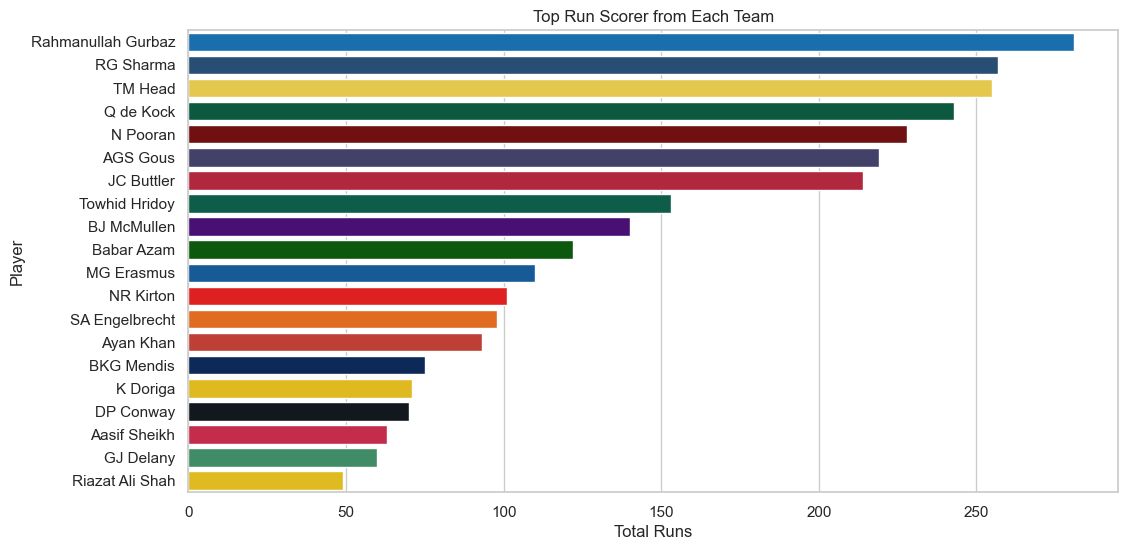

In [24]:
# Total runs per player
batsman_runs = balls.groupby('striker')['runs_off_bat'].sum().reset_index()

# Add team info
batsman_runs['team'] = batsman_runs['striker'].map(player_team_map)

# Get top scorer per team
top_batsmen_by_team = batsman_runs.sort_values('runs_off_bat', ascending=False).drop_duplicates('team')

# Color mapping
colors = [team_colors.get(team, "#999999") for team in top_batsmen_by_team['team']]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_batsmen_by_team['runs_off_bat'], y=top_batsmen_by_team['striker'], palette=colors)
plt.title("Top Run Scorer from Each Team")
plt.xlabel("Total Runs")
plt.ylabel("Player")
plt.show()


C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\4198409436.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers_by_team['wickets'], y=top_bowlers_by_team['bowler'], palette=colors)


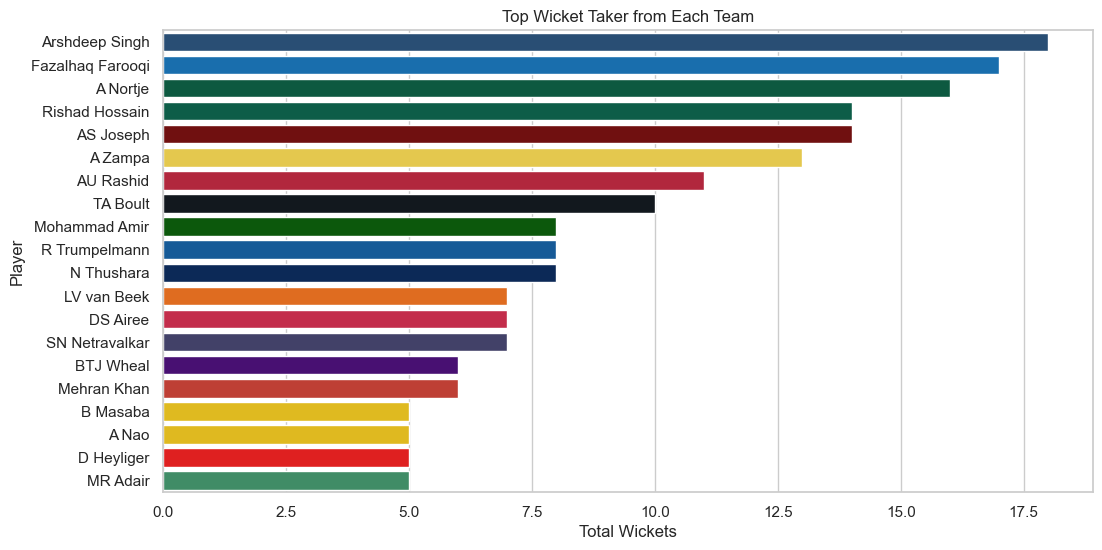

In [25]:
# Filter only rows where wicket was taken
wicket_data = balls[balls['wicket_type'].notna()]

# Count wickets per bowler
bowler_wickets = wicket_data['bowler'].value_counts().reset_index()
bowler_wickets.columns = ['bowler', 'wickets']

# Add team info
bowler_wickets['team'] = bowler_wickets['bowler'].map(player_team_map)

# Get top wicket-taker per team
top_bowlers_by_team = bowler_wickets.sort_values('wickets', ascending=False).drop_duplicates('team')

# Color mapping
colors = [team_colors.get(team, "#999999") for team in top_bowlers_by_team['team']]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_bowlers_by_team['wickets'], y=top_bowlers_by_team['bowler'], palette=colors)
plt.title("Top Wicket Taker from Each Team")
plt.xlabel("Total Wickets")
plt.ylabel("Player")
plt.show()


C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\2878796137.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dot_counts.values, y=dot_counts.index, palette=colors)


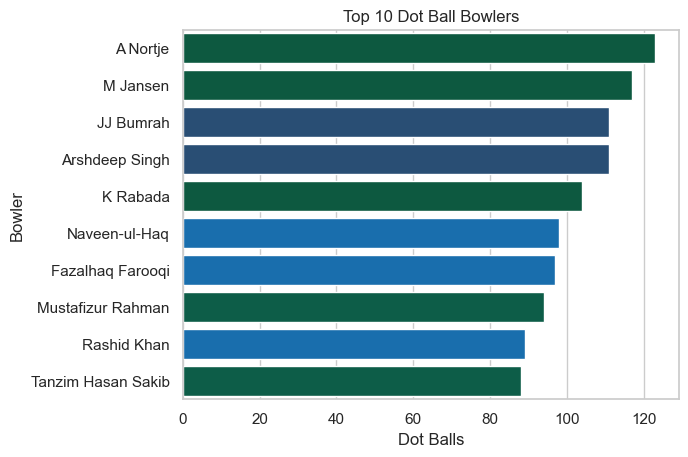

In [26]:
#  Dot Ball Pressure Index 
dot_balls = balls[balls['runs_off_bat'] == 0]
dot_counts = dot_balls['bowler'].value_counts().head(10)
colors = [team_colors.get(player_team_map.get(p, ""), "#999999") for p in dot_counts.index]

sns.barplot(x=dot_counts.values, y=dot_counts.index, palette=colors)
plt.title("Top 10 Dot Ball Bowlers")
plt.xlabel("Dot Balls")
plt.ylabel("Bowler")
plt.show()

C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\237086055.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=death_runs.values, y=death_runs.index, palette=colors)


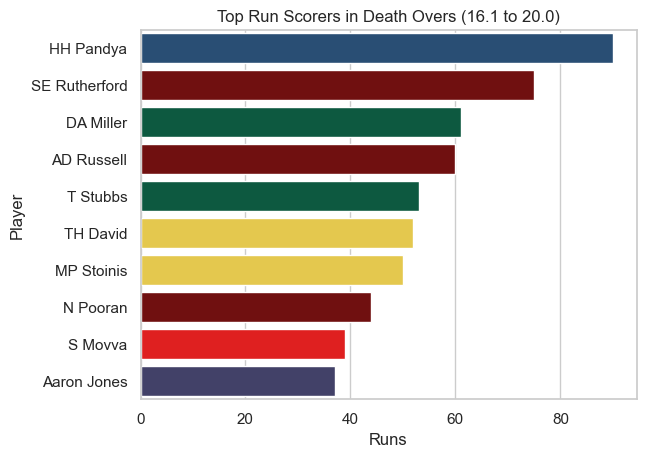

In [27]:
# Clutch Batting in Death Overs (16.1 to 20)
death_overs = balls[(balls['ball'] >= 16.1) & (balls['ball'] <= 20.0)]
death_runs = death_overs.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)
colors = [team_colors.get(player_team_map.get(p, ""), "#999999") for p in death_runs.index]

sns.barplot(x=death_runs.values, y=death_runs.index, palette=colors)
plt.title("Top Run Scorers in Death Overs (16.1 to 20.0)")
plt.xlabel("Runs")
plt.ylabel("Player")
plt.show()

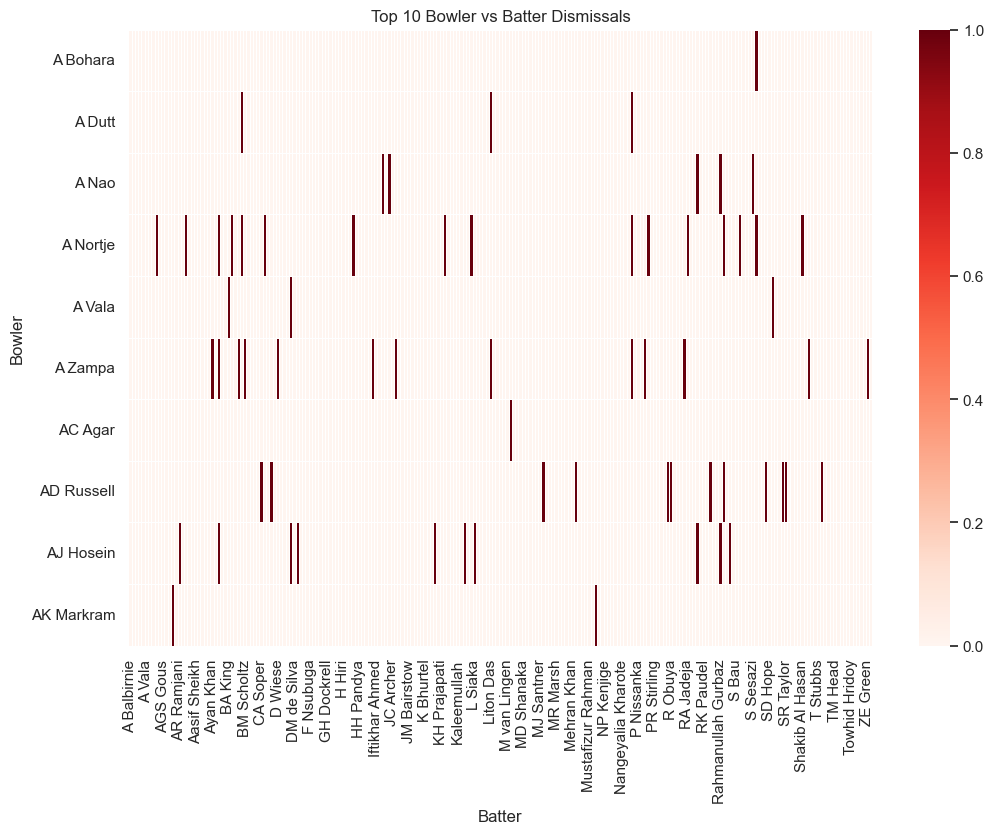

In [28]:
#bowler vs batsman
matchups = balls[balls['wicket_type'].notna()]
matrix = matchups.pivot_table(index='bowler', columns='player_dismissed', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(matrix.head(10), cmap="Reds", linewidths=.5)
plt.title("Top 10 Bowler vs Batter Dismissals")
plt.xlabel("Batter")
plt.ylabel("Bowler")
plt.show()

C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\4199564694.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bat_stats['strike_rate'], y=bat_stats['striker'], palette=colors)


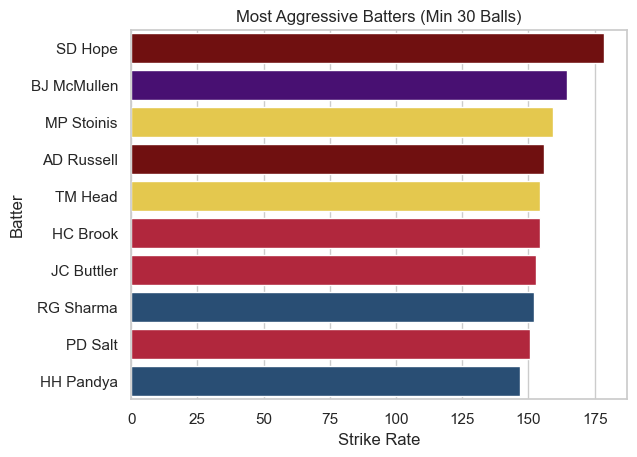

In [29]:
# Total runs and balls faced
bat_stats = balls.groupby('striker').agg(
    runs=('runs_off_bat', 'sum'),
    balls_faced=('ball', 'count')
).reset_index()

# Filter and compute strike rate
bat_stats = bat_stats[bat_stats['balls_faced'] >= 30]
bat_stats['strike_rate'] = bat_stats['runs'] / bat_stats['balls_faced'] * 100
bat_stats = bat_stats.sort_values('strike_rate', ascending=False).head(10)

# Color map
colors = [team_colors.get(player_team_map.get(p, ""), "#999999") for p in bat_stats['striker']]

# Plot
sns.barplot(x=bat_stats['strike_rate'], y=bat_stats['striker'], palette=colors)
plt.title("Most Aggressive Batters (Min 30 Balls)")
plt.xlabel("Strike Rate")
plt.ylabel("Batter")
plt.show()


In [30]:
# Extract over info
balls['over'] = balls['ball'].astype(str).str.extract(r'(\d+)\.\d').astype(float)
choke_overs = balls[balls['wicket_type'].notna()]
grouped = choke_overs.groupby(['match_id', 'innings', 'over']).size().reset_index(name='wicket_count')
top_chokes = grouped[grouped['wicket_count'] >= 2].sort_values('wicket_count', ascending=False)

top_chokes.head(10)  # View top 10 choke overs


,match_id,innings,over,wicket_count
533,48,1,18.0,4
183,15,1,19.0,3
56,4,2,12.0,3
153,13,1,19.0,3
433,39,2,7.0,2
485,44,1,19.0,2
477,43,1,17.0,2
470,42,2,17.0,2
440,40,1,12.0,2
435,39,2,12.0,2


C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\1896309844.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runner_scores.values, y=runner_scores.index, palette=colors)


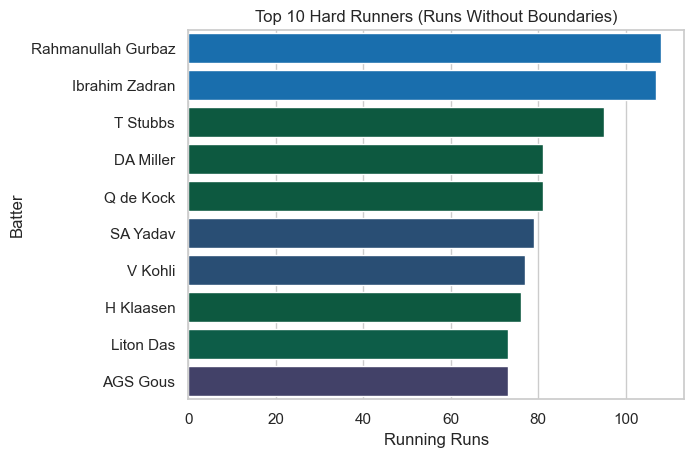

In [33]:
#hard runner
non_boundary = balls[balls['runs_off_bat'] < 4]
runner_scores = non_boundary.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)

colors = [team_colors.get(player_team_map.get(p, ""), "#999999") for p in runner_scores.index]
sns.barplot(x=runner_scores.values, y=runner_scores.index, palette=colors)
plt.title("Top 10 Hard Runners (Runs Without Boundaries)")
plt.xlabel("Running Runs")
plt.ylabel("Batter")
plt.show()


C:\Users\Vedha\AppData\Local\Temp\ipykernel_1052\2230171437.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=partnerships.values, y=pairs, palette=colors)


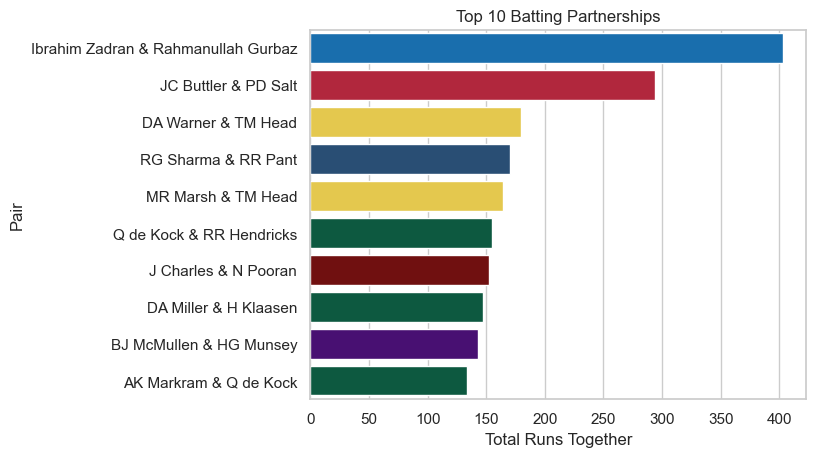

In [35]:
# Create batter pair from sorted tuple
balls['pair'] = balls.apply(lambda row: tuple(sorted([row['striker'], row['non_striker']])), axis=1)

# Sum runs per pair
partnerships = balls.groupby('pair')['runs_off_bat'].sum().sort_values(ascending=False).head(10)

# Format for labels
pairs = [' & '.join(pair) for pair in partnerships.index]

# Identify team for each pair using the team of the first player
pair_teams = [player_team_map.get(pair[0], "Unknown") for pair in partnerships.index]

# Use team colors
colors = [team_colors.get(team, "#9e9e9e") for team in pair_teams]

# Plot
sns.barplot(x=partnerships.values, y=pairs, palette=colors)
plt.title("Top 10 Batting Partnerships")
plt.xlabel("Total Runs Together")
plt.ylabel("Pair")
plt.show()

